In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from warnings import filterwarnings

filterwarnings('ignore')

train = pd.read_csv('characters-digits-train.csv') #importing file train dataset into train dataframe  

In [2]:
train.info()                                       #getting dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112799 entries, 0 to 112798
Columns: 785 entries, 45 to 0.533
dtypes: int64(785)
memory usage: 675.6 MB


In [3]:
train.head()                #printing head (first 5 rows of dataframe) for looking up column header names and rows starting with

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Altering data frame in order

In [4]:
train = train.append(pd.Series(), ignore_index=True)     #adding empty column in the last row
train = train.shift(1, axis = 0)                         #shifting rows by one
train.iloc[0] = train.columns.astype(float)              #copy column header to 0th row
#train.drop(112800,inplace=True)
new_header=['labels']     
new_header.extend("pixel"+str(i) for i in range(784))
train.columns=new_header                                 #creating column names
print(train.head())
train.tail()

   labels  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0    45.0     0.0     0.1     0.2     0.3     0.4     0.5     0.6     0.7   
1    36.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    43.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    15.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.8  ...     0.524     0.525     0.526     0.527     0.528     0.529   
1     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   
2     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   
3     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   
4     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   

   pixel780  pixel781  pixel782  pixel783  
0      0.53     0.531   

,labels,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
112795,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112796,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112797,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112798,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112799,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train.info()                                               #getting dataframe information after altering dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112800 entries, 0 to 112799
Columns: 785 entries, labels to pixel783
dtypes: float64(785)
memory usage: 675.6 MB


In [6]:
four = train.iloc[4, 1:]                                 #copying fourth row data pixels that contains handwritten four digit
four.shape

(784,)

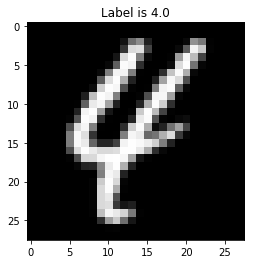

In [7]:
label = train.iloc[4, 0]                                 #copying fourth row label
four = np.array(four, dtype='uint8')
four = four.reshape((28, 28))                            # Reshape the array into 28 x 28 array (2-dimensional array)
plt.title('Label is {label}'.format(label=label))        # plot
plt.imshow(four.T, cmap='gray')                          #use transpose as this image data is in inverse 
plt.show()    


In [8]:
print(four[5:-5, 5:-5].T)                               # printing pixels data

[[  0   0   0   0   0   8  95 251 244  46   0   0   0  12 220 253 115   6]
 [  0   0   0   0  10 127 244 244 127   1   0   1  47 195 250 175   8   0]
 [  0   0   0   0  91 221 253 175  34   0   0  33 163 247 218  79   0   0]
 [  0   0   0  12 207 253 246  79   3   0   1 127 244 251  95   8   0   0]
 [  0   0  33 190 253 244 127   1   0   3  79 245 247 163   7   0   0   0]
 [  0   1  96 234 247 163  33   0   0  36 175 253 208  47   0   0   0   0]
 [  0  34 243 254 159  22   0   0   4 202 253 187  67   2   0   0   0   0]
 [  3  84 252 244  47   1   0   1  36 234 251  84   4   0   8  13   0   0]
 [ 77 220 246 128   1   0   0  46 207 251 175  12  34 114 161  69   0   0]
 [125 249 222  51   0   0   1 128 246 235 106 116 175 220  58   7   0   0]
 [125 249 234 101  37  37  64 244 254 249 236 207 126  34   0   0   0   0]
 [ 77 220 253 234 217 217 222 254 254 232 171  46   8   0   0   0   0   0]
 [  3  78 215 217 246 254 255 246 164  22   3   0   0   0   0   0   0   0]
 [  0   7  37  39 134 236

In [9]:
train.labels.astype('category').value_counts()          # getting categories(labels) count and type

46.0    2400
11.0    2400
20.0    2400
19.0    2400
18.0    2400
17.0    2400
16.0    2400
15.0    2400
14.0    2400
13.0    2400
12.0    2400
10.0    2400
22.0    2400
9.0     2400
8.0     2400
7.0     2400
6.0     2400
5.0     2400
4.0     2400
3.0     2400
2.0     2400
1.0     2400
21.0    2400
23.0    2400
45.0    2400
35.0    2400
44.0    2400
43.0    2400
42.0    2400
41.0    2400
40.0    2400
39.0    2400
38.0    2400
37.0    2400
36.0    2400
34.0    2400
24.0    2400
33.0    2400
32.0    2400
31.0    2400
30.0    2400
29.0    2400
28.0    2400
27.0    2400
26.0    2400
25.0    2400
0.0     2400
Name: labels, dtype: int64

In [10]:
train.isnull().any().sum()                              #checking for NAN values if any

0

In [11]:
train.describe()                                        #getting details of dataframe

,labels,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,112800.00000,112800.0,1.128000e+05,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000
mean,23.00000,0.0,8.865248e-07,0.000002,0.000003,0.001369,0.011565,0.020706,0.017444,0.018482,...,0.000315,0.000005,0.000005,0.002168,0.000288,0.000005,0.000005,0.000005,0.000005,0.000005
std,13.56472,0.0,2.977457e-04,0.000595,0.000893,0.235049,1.221827,1.658798,1.602480,1.719550,...,0.104223,0.001563,0.001566,0.726501,0.095292,0.001575,0.001578,0.001581,0.001584,0.001587
min,0.00000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.00000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.00000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.00000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.00000,0.0,1.000000e-01,0.200000,0.300000,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.525000,0.526000,244.000000,32.000000,0.529000,0.530000,0.531000,0.532000,0.533000


In [12]:
X = train.drop('labels', axis=1)                        # splitting dataframe data into X and y for training
y = train['labels']
X = scale(X)

In [13]:
train['labels'].unique()                                #checking no.of unique labels are of similar type for training

array([45., 36., 43., 15.,  4., 42., 26., 32., 20.,  1., 46., 13., 24.,
       12.,  5., 17.,  3., 40., 14., 44., 19., 29., 25., 35., 28., 23.,
       22., 34.,  9., 30., 38., 39., 37., 31., 16.,  7.,  2.,  8., 10.,
        6., 27., 33., 11., 18., 41.,  0., 21.])

# Training the model(SVM)

In [14]:
#Choosing the best parameters
best_C = 1000
best_gamma = 0.001

final_svc = SVC(C=best_C,kernel='rbf',gamma=best_gamma)

final_svc.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
test = pd.read_csv('characters-digits-test.csv')        #loading test dataset into test dataframe

In [16]:
test = test.append(pd.Series(), ignore_index=True)      #adding empty column in the last row
test = test.shift(1, axis = 0)                          #shifting rows by one
test.iloc[0] = test.columns.astype(float)               #copy column header to 0th row
#train.drop(112800,inplace=True)
new_header=['labels']                      
new_header.extend("pixel"+str(i) for i in range(784))
test.columns=new_header                                 #creating column names
print(test.head())
test.tail()

   labels  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0    41.0     0.0     0.1     0.2     0.3     0.4     0.5     0.6     0.7   
1    39.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     9.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    26.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    44.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.8  ...     0.523     0.524     0.525     0.526     0.527     0.528   
1     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   
2     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   
3     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   
4     0.0  ...     0.000     0.000     0.000     0.000     0.000     0.000   

   pixel780  pixel781  pixel782  pixel783  
0     0.529      0.53   

,labels,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18795,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18796,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18797,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18798,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18799,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
test.info()                                             #getting dataframe information after altering dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Columns: 785 entries, labels to pixel783
dtypes: float64(785)
memory usage: 112.6 MB


In [18]:
x_test = test.drop('labels', axis=1)                    # splitting dataframe data into x_test and y_test for testing
y_test = test['labels']
x_test = scale(x_test)

# Predicting using SVM

In [19]:
predictions = final_svc.predict(x_test)                 #predicting using SVM model

In [20]:
print('Confusion matrix:\n',confusion_matrix(y_test, predictions))           #printing confusion matrix

Confusion matrix:
 [[255   0   0 ...   0   0   0]
 [  0 237   1 ...   1   0   1]
 [  0   0 340 ...   1   0   0]
 ...
 [  0   0   0 ... 205   1   2]
 [  0   1   0 ...   0 368   1]
 [  0   2   1 ...   1   6 340]]


In [21]:
print('Classification report:\n',classification_report(y_test, predictions)) #printing classification report

Classification report:
               precision    recall  f1-score   support

         0.0       0.61      0.64      0.62       400
         1.0       0.52      0.59      0.56       400
         2.0       0.85      0.85      0.85       400
         3.0       0.93      0.95      0.94       400
         4.0       0.88      0.88      0.88       400
         5.0       0.89      0.83      0.86       400
         6.0       0.88      0.89      0.89       400
         7.0       0.94      0.96      0.95       400
         8.0       0.86      0.89      0.88       400
         9.0       0.65      0.72      0.68       400
        10.0       0.89      0.88      0.89       400
        11.0       0.91      0.89      0.90       400
        12.0       0.92      0.93      0.92       400
        13.0       0.87      0.86      0.86       400
        14.0       0.94      0.92      0.93       400
        15.0       0.58      0.58      0.58       400
        16.0       0.86      0.85      0.86       400
   

# Accuracy

In [22]:
print('Accuracy score:\n',accuracy_score(y_test, predictions))               #Prediction's Accuracy

Accuracy score:
 0.8246808510638298


In [23]:
print(predictions)                                                           # printing pridictions

[32. 39.  9. ...  1. 26. 33.]


# Creating Dataframe for loading Predictions and Tasks output

In [24]:
tasks = pd.DataFrame(y_test)                            # actual output
tasks.index = test.index                                # its important for comparison
tasks['Predictions'] = predictions                      # predicted output
tasks.columns = ["labels","Predictions"]                # its important for comparison

In [25]:
print(tasks.head())                               
tasks.tail()                                            #checking dataframe 

   labels  Predictions
0    41.0         32.0
1    39.0         39.0
2     9.0          9.0
3    26.0         26.0
4    44.0         44.0


,labels,Predictions
18795,45.0,45.0
18796,15.0,15.0
18797,1.0,1.0
18798,26.0,26.0
18799,33.0,33.0


# Task1: Letter/Digit Classifier

In [26]:
dict1 = dict(zip(range(47),["digit"]*10+["letter"]*37)) # creating dictionary1-Naming as digit and letter for 47 classes
print(dict1)

{0: 'digit', 1: 'digit', 2: 'digit', 3: 'digit', 4: 'digit', 5: 'digit', 6: 'digit', 7: 'digit', 8: 'digit', 9: 'digit', 10: 'letter', 11: 'letter', 12: 'letter', 13: 'letter', 14: 'letter', 15: 'letter', 16: 'letter', 17: 'letter', 18: 'letter', 19: 'letter', 20: 'letter', 21: 'letter', 22: 'letter', 23: 'letter', 24: 'letter', 25: 'letter', 26: 'letter', 27: 'letter', 28: 'letter', 29: 'letter', 30: 'letter', 31: 'letter', 32: 'letter', 33: 'letter', 34: 'letter', 35: 'letter', 36: 'letter', 37: 'letter', 38: 'letter', 39: 'letter', 40: 'letter', 41: 'letter', 42: 'letter', 43: 'letter', 44: 'letter', 45: 'letter', 46: 'letter'}


In [27]:
tasks['Task 1: Letter/Digit Classifier']= tasks['Predictions'].map(dict1)#letter/digit classifying-by mapping predictions with 
                                                                        #dict1 output and getting into dataframe's task1 column

# Task 2: Vowel/Consonant and Even/Odd Classifier

In [28]:
c = (48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 97, 98, 100, 101, 102, 103, 104, 110, 113, 114, 116)
dict3= { }                                                          #ASCII list for mapping
for i in range(47):                                                 # creating dictionary3-for character assining to 47 classes
    if(i<10):
        dict3.update({i: i}) #or dict1.update({int(i): int(chr(c[i]))})
    else:
        dict3.update({i: chr(c[i])})

print(dict3)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


In [29]:
dict_a,dict_b ={ },{ }      #dict_a,dict_b splitting dictionary into digits and letters for odd/even and vowel/consonant classifier
[dict_a.setdefault(k,v) if k <10 else dict_b.setdefault(k,v) for k,v in dict3.items()]
print(dict_a)
print(dict_b)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
{10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


In [30]:
num= {el:'odd' if dict_a[el] % 2==1 else 'even' for el in dict_a}  #odd or even digits assigning for 10 digits
h = ['a','e','i','o','u','A','E','I','O','U']                      #vowel/consonant assigning for 37 alphabets
alpha = {key:"vowel" if value in h else 'consonant' for key,value in dict_b.items()}
num.update(alpha)
dict2 = num.copy()                               # creating dictionary3-for Vowel/Consonant and Even/Odd assining to 47 classes
print(dict2)                           

{0: 'even', 1: 'odd', 2: 'even', 3: 'odd', 4: 'even', 5: 'odd', 6: 'even', 7: 'odd', 8: 'even', 9: 'odd', 10: 'vowel', 11: 'consonant', 12: 'consonant', 13: 'consonant', 14: 'vowel', 15: 'consonant', 16: 'consonant', 17: 'consonant', 18: 'vowel', 19: 'consonant', 20: 'consonant', 21: 'consonant', 22: 'consonant', 23: 'consonant', 24: 'vowel', 25: 'consonant', 26: 'consonant', 27: 'consonant', 28: 'consonant', 29: 'consonant', 30: 'vowel', 31: 'consonant', 32: 'consonant', 33: 'consonant', 34: 'consonant', 35: 'consonant', 36: 'vowel', 37: 'consonant', 38: 'consonant', 39: 'vowel', 40: 'consonant', 41: 'consonant', 42: 'consonant', 43: 'consonant', 44: 'consonant', 45: 'consonant', 46: 'consonant'}


In [31]:
tasks['Task 2: Vowel/Consonant and Even/Odd Classifier']= tasks.Predictions.map(dict2)#Vowel/Consonant and Even/Odd Classifying-
                                             #by mapping predictions with dict2 output and getting into dataframe's task2 column

# Task 3: Character Classifier

In [32]:
tasks['Task 3: Character Classifier']= tasks.Predictions.map(dict3) #Finally Character Classifying- by mapping predictions with 
                                                                      #dict3 output and getting into dataframe's task3 column

# Loading Dataframe data of Actual,Predicted,Tasks-1,2,3 outputs into csv file

In [33]:
tasks.to_csv("character digit prediction results.csv")             